<a href="https://colab.research.google.com/github/svperbeast/ai_lab/blob/main/ai_lab_20201103_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import torch
import torch.nn as nn
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [17]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device('cuda' if USE_CUDA else 'cpu')

In [18]:
x_train, y_train = make_blobs(n_samples=80,
                               n_features=2,
                               centers=[[0, 0], [0, 1], [1, 0], [1, 1]],
                               cluster_std=0.15, shuffle=True)
x_test, y_test = make_blobs(n_samples=80,
                               n_features=2,
                               centers=[[0, 0], [0, 1], [1, 0], [1, 1]],
                               cluster_std=0.15, shuffle=True)

In [19]:
def label_map(y_, from_, to_):
  y = np.copy(y_)
  for f in from_:
    y[y_ == f] = to_
  return y

In [20]:
y_train = label_map(y_train, [0, 1], 0)
y_train = label_map(y_train, [2, 3], 1)
y_test = label_map(y_test, [0, 1], 0)
y_test = label_map(y_test, [2, 3], 1)

In [21]:
x_train = torch.FloatTensor(x_train).to(DEVICE)
x_test = torch.FloatTensor(x_test).to(DEVICE)
y_train = torch.FloatTensor(y_train).to(DEVICE)
y_test = torch.FloatTensor(y_test).to(DEVICE)

y_train = y_train.view(-1, 1)
y_test = y_test.view(-1, 1)

In [27]:
model = nn.Sequential(
    nn.Linear(2, 4, bias=True),
    nn.Sigmoid(),
    nn.Linear(4, 1, bias=True),
    nn.Sigmoid()
).to(DEVICE)

# Binary Cross Entropy Loss
criterion = torch.nn.BCELoss().to(DEVICE)

# Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

niters = 20000
costs = []
for step in range(niters):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  cost = criterion(hypothesis, y_train)
  cost.backward()

  optimizer.step()

  costs.append(cost.item())
  if step % 500 == 0:
    print("step: {} cost: {:.4f}".format(step, cost.item()))

step: 0 cost: 0.6909
step: 500 cost: 0.2490
step: 1000 cost: 0.0711
step: 1500 cost: 0.0378
step: 2000 cost: 0.0253
step: 2500 cost: 0.0189
step: 3000 cost: 0.0150
step: 3500 cost: 0.0124
step: 4000 cost: 0.0106
step: 4500 cost: 0.0092
step: 5000 cost: 0.0082
step: 5500 cost: 0.0073
step: 6000 cost: 0.0066
step: 6500 cost: 0.0061
step: 7000 cost: 0.0056
step: 7500 cost: 0.0052
step: 8000 cost: 0.0048
step: 8500 cost: 0.0045
step: 9000 cost: 0.0042
step: 9500 cost: 0.0040
step: 10000 cost: 0.0038
step: 10500 cost: 0.0036
step: 11000 cost: 0.0034
step: 11500 cost: 0.0032
step: 12000 cost: 0.0031
step: 12500 cost: 0.0030
step: 13000 cost: 0.0028
step: 13500 cost: 0.0027
step: 14000 cost: 0.0026
step: 14500 cost: 0.0025
step: 15000 cost: 0.0024
step: 15500 cost: 0.0024
step: 16000 cost: 0.0023
step: 16500 cost: 0.0022
step: 17000 cost: 0.0021
step: 17500 cost: 0.0021
step: 18000 cost: 0.0020
step: 18500 cost: 0.0019
step: 19000 cost: 0.0019
step: 19500 cost: 0.0018


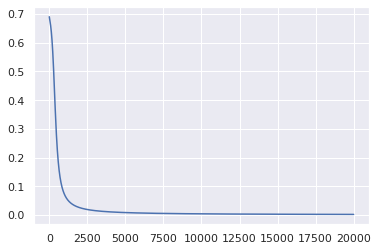

In [34]:
plt.plot(costs)
plt.show()

In [35]:
with torch.no_grad():
  hypothesis = model(x_test)
  predicted = (hypothesis > 0.5).float()
  accuracy = (predicted == y_test).float().mean()
  # print("model hypothesis: {}".format(hypothesis.detach().cpu().numpy()))
  # print("model predicted: {}".format(predicted.detach().cpu().numpy()))
  # print("y_test: {}".format(y_test.cpu().numpy()))
  print("accuracy: {}".format(accuracy.item()))

accuracy: 1.0


In [ ]:
## Custom NN Module

In [39]:
class Net(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(Net, self).__init__()

    self.input_size = input_size
    self.hidden_size = hidden_size

    self.linear1 = nn.Linear(input_size, hidden_size)
    self.linear2 = nn.Linear(hidden_size, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, input_tensor):
    net1 = self.sigmoid(self.linear1(input_tensor))
    return self.sigmoid(self.linear2(net1))


In [41]:
model = Net(2, 5)

In [42]:
model

Net(
  (linear1): Linear(in_features=2, out_features=5, bias=True)
  (linear2): Linear(in_features=5, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)